Mount to google drive.

In [1]:
from google.colab import drive
drive.mount('/content/gdrive',force_remount=True)

Mounted at /content/gdrive


Unzip two dataSets.

In [2]:
!unzip /content/gdrive/MyDrive/RAVDESS/Audio_Speech_Actors_01-24.zip -d /content/gdrive/MyDrive/RAVDESS/Audio_Speech_Actors_01-24

unzip:  cannot find or open /content/gdrive/MyDrive/RAVDESS/Audio_Speech_Actors_01-24.zip, /content/gdrive/MyDrive/RAVDESS/Audio_Speech_Actors_01-24.zip.zip or /content/gdrive/MyDrive/RAVDESS/Audio_Speech_Actors_01-24.zip.ZIP.


In [ ]:
!unzip /content/gdrive/MyDrive/RAVDESS_and_Savee_Dataset/Savee.zip -d /content/gdrive/MyDrive/RAVDESS_and_Savee_Dataset/Savee

Move all classified files to 'Raw Data' folder.

In [ ]:
import os
import shutil

root = '/content/gdrive/MyDrive/RAVDESS_and_Savee_Dataset/Audio_Speech_Actors_01-24/'
allsrcs = os.listdir(root)
dest = '/content/gdrive/MyDrive/RAVDESS_and_Savee_Dataset/RawData/'

for src in allsrcs:
  src = root + src + '/'
  allfiles = os.listdir(src)
  for f in allfiles:
    shutil.move(src+f,dest+f)

In [ ]:
changeNameSrc = '/content/gdrive/MyDrive/RAVDESS_and_Savee_Dataset/Savee/AudioData/JE/'
changeNameAllFiles = os.listdir(changeNameSrc)
for f in changeNameAllFiles:
  os.rename(changeNameSrc + f,changeNameSrc + f[:-4] + '(3)' + '.wav')

In [ ]:
root2 = '/content/gdrive/MyDrive/RAVDESS_and_Savee_Dataset/Savee/AudioData/'
allsrcs2 = os.listdir(root2)
dest = '/content/gdrive/MyDrive/RAVDESS_and_Savee_Dataset/RawData/'

for src in allsrcs2:
  src = root2 + src + '/'
  allfiles = os.listdir(src)
  for f in allfiles:
    shutil.move(src+f,dest+f)

DataSet: RAVDESS(1440)+SAVEE(480)

In [3]:
import os
RawDataPath = '/content/gdrive/MyDrive/RAVDESS_and_Savee_Dataset/RawData/'
allDatas = os.listdir(RawDataPath)
allDatas.sort()
print(len(allDatas))

1920


In [4]:
type(allDatas)

list

In [5]:
print(allDatas[1800])

sa01(1).wav


In [6]:
print(allDatas[130][6:-16])

02


Importing the required libraries.

In [7]:
import os
import librosa
import librosa.display
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from matplotlib.pyplot import specgram
import tensorflow.keras
from tensorflow.keras.preprocessing import sequence
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Embedding
from tensorflow.keras.layers import LSTM
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.layers import Input, Flatten, Dropout, Activation
from tensorflow.keras.layers import Conv1D, MaxPooling1D, AveragePooling1D
from tensorflow.keras.models import Model
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras import regularizers
from sklearn.metrics import confusion_matrix

Plotting the audio file's waveform and itss spectrogram.

In [8]:
RawDataPath = '/content/gdrive/MyDrive/RAVDESS_and_Savee_Dataset/RawData/'
data, sampling_rate = librosa.load(RawDataPath+'f11(2).wav')

To learn more about '%' in ipython:  
https://stackoverflow.com/questions/20961287/what-is-pylab

Populating the interactive namespace from numpy and matplotlib


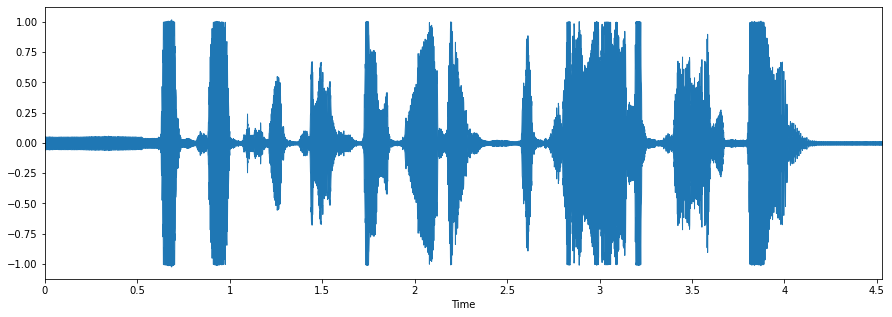

In [9]:
%pylab inline
import pandas as pd
import glob 

plt.figure(figsize=(15, 5))
librosa.display.waveplot(data, sr=sampling_rate)

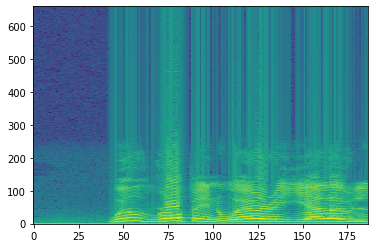

In [10]:
import matplotlib.pyplot as plt
import scipy.io.wavfile
import numpy as np
import sys

sr,x = scipy.io.wavfile.read(RawDataPath+'f10(2).wav')

## Parameters: 10ms step, 30ms window
nstep = int(sr * 0.01)
nwin  = int(sr * 0.03)
nfft = nwin

window = np.hamming(nwin)

## will take windows x[n1:n2].  generate
## and loop over n2 such that all frames
## fit within the waveform
nn = range(nwin, len(x), nstep)

X = np.zeros( (len(nn), nfft//2) )

for i,n in enumerate(nn):
    xseg = x[n-nwin:n]
    z = np.fft.fft(window * xseg, nfft)
    X[i,:] = np.log(np.abs(z[:nfft//2]))

plt.imshow(X.T, interpolation='nearest',
    origin='lower',
    aspect='auto')

plt.show()

Setting the labels

In [129]:
emotion_list=[]
for speech in allDatas:
  if speech[6:-16]=='01' and int(speech[18:-4])%2==0:
    emotion_list.append('female_neutral')
  elif speech[6:-16]=='01' and int(speech[18:-4])%2==1:
    emotion_list.append('male_neutral')
  elif speech[6:-16]=='02' and int(speech[18:-4])%2==0:
    emotion_list.append('female_calm')
  elif speech[6:-16]=='02' and int(speech[18:-4])%2==1:
    emotion_list.append('male_calm')
  elif speech[6:-16]=='03' and int(speech[18:-4])%2==0:
    emotion_list.append('female_happy')
  elif speech[6:-16]=='03' and int(speech[18:-4])%2==1:
    emotion_list.append('male_happy')
  elif speech[6:-16]=='04' and int(speech[18:-4])%2==0:
    emotion_list.append('female_sad')
  elif speech[6:-16]=='04' and int(speech[18:-4])%2==1:
    emotion_list.append('male_sad')
  elif speech[6:-16]=='05' and int(speech[18:-4])%2==0:
    emotion_list.append('female_angry')
  elif speech[6:-16]=='05' and int(speech[18:-4])%2==1:
    emotion_list.append('male_angry')
  elif speech[6:-16]=='06' and int(speech[18:-4])%2==0:
    emotion_list.append('female_fearful')
  elif speech[6:-16]=='06' and int(speech[18:-4])%2==1:
    emotion_list.append('male_fearful')
  elif speech[6:-16]=='07' and int(speech[18:-4])%2==0:
    emotion_list.append('female_disgust')
  elif speech[6:-16]=='07' and int(speech[18:-4])%2==1:
    emotion_list.append('male_disgust')
  elif speech[6:-16]=='08' and int(speech[18:-4])%2==0:
    emotion_list.append('female_surprised')
  elif speech[6:-16]=='08' and int(speech[18:-4])%2==1:
    emotion_list.append('male_surprised')
  """
  elif speech[:1]=='a':
    emotion_list.append('male_angry')
  elif speech[:1]=='d':
    emotion_list.append('male_disgust')
  elif speech[:1]=='f':
    emotion_list.append('male_fearful')
  elif speech[:1]=='h':
    emotion_list.append('male_happy')
  elif speech[:1]=='n':
    emotion_list.append('male_neutral')
  elif speech[:2]=='sa':
    emotion_list.append('male_sad')
  elif speech[:2]=='su':
    emotion_list.append('male_surprised')
  """

In [130]:
labels = pd.DataFrame(emotion_list)

In [131]:
len(labels)

1440

Getting the features of audio files using libRosa

In [133]:
df = pd.DataFrame(columns=['feature'])
bookmark = 0
for index, y in enumerate(allDatas):
  if allDatas[index][:2]!='su' and allDatas[index][:2]!='sa' and allDatas[index][:1]!='n' and allDatas[index][:1]!='h' and allDatas[index][:1]!='f' and allDatas[index][:1]!='d' and allDatas[index][:1]!='a':
    X, sample_rate = librosa.load(RawDataPath + y, res_type='kaiser_fast', duration=2.5, sr=22050*2, offset=0.5)
    sample_rate = np.array(sample_rate)
    mfccs = np.mean(librosa.feature.mfcc(y=X, sr=sample_rate, n_mfcc=13), axis=0)
    feature = mfccs
    df.loc[bookmark] = [feature]
    bookmark = bookmark+1

In [135]:
df[:5]

,feature
0,"[-65.80097, -65.80097, -65.80097, -65.80097, -..."
1,"[-63.2142, -63.2142, -63.2142, -63.2142, -63.2..."
2,"[-60.258648, -60.258648, -60.258648, -60.25864..."
3,"[-66.48809, -66.48809, -66.48809, -66.48809, -..."
4,"[-60.262447, -60.367622, -64.73905, -66.27124,..."


In [136]:
df3 = pd.DataFrame(df['feature'].values.tolist())

In [137]:
df3[:5]

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215
0,-65.800972,-65.800972,-65.800972,-65.800972,-65.800972,-65.800972,-65.800972,-65.800972,-65.800972,-65.800972,-65.800972,-65.800972,-65.800972,-65.800972,-65.800972,-65.800972,-65.793167,-65.800972,-65.800972,-65.800972,-63.896137,-60.063339,-61.391453,-59.506573,-61.304344,-60.479439,-59.622013,-59.312962,-56.807724,-57.467476,-54.780277,-54.338120,-56.671490,-56.021694,-55.159336,-55.876816,-56.127678,-56.435852,-55.660587,-53.222069,...,-59.615318,-56.169899,-57.875557,-61.149490,-62.058128,-58.724915,-56.277634,-58.083107,-60.733639,-62.754219,-63.549236,-64.526268,-65.800972,-65.771172,-62.390427,-60.171204,-61.831570,-64.845856,-64.133095,-63.383667,-61.310825,-60.995464,-62.350342,-62.845238,-60.302467,-58.946526,-59.711815,-56.837093,-56.425766,-56.877964,-58.299904,-62.295246,-64.930115,-65.332123,-64.116928,-64.319908,-64.971420,-63.155781,-64.178665,-63.061893
1,-63.214199,-63.214199,-63.214199,-63.214199,-63.214199,-63.167271,-63.385483,-63.461838,-63.336159,-63.204266,-63.214199,-63.214199,-63.214199,-63.214199,-63.214199,-63.214199,-63.304836,-63.224102,-63.214199,-63.214199,-63.214199,-63.240303,-63.331821,-63.373924,-63.219158,-63.228676,-63.267010,-63.214199,-63.214199,-63.214199,-63.214199,-63.214199,-63.214199,-63.214199,-63.214199,-63.214199,-63.214199,-63.214199,-63.214199,-63.092106,...,-33.563103,-36.922020,-34.637623,-34.049461,-32.516621,-32.252632,-35.323311,-36.909855,-38.544521,-41.462135,-41.712772,-42.326973,-43.196594,-44.127296,-44.722416,-47.005272,-52.414444,-56.311607,-56.919998,-52.116135,-47.951035,-48.240688,-49.206913,-52.699368,-54.648331,-51.877098,-51.305504,-53.409504,-54.568684,-51.800827,-50.994122,-53.428589,-53.139488,-52.853867,-55.247734,-57.681992,-57.166061,-57.039677,-56.066059,-58.502811
2,-60.258648,-60.258648,-60.258648,-60.258648,-60.258648,-60.258648,-60.258648,-60.258648,-60.258648,-60.258648,-60.258648,-60.258648,-60.258648,-60.258648,-60.258648,-60.258648,-60.258648,-60.258648,-60.258648,-60.258648,-60.039200,-59.663940,-60.693974,-57.432137,-55.339828,-56.847816,-58.747978,-60.694939,-59.840591,-59.196472,-59.942505,-60.324978,-60.258648,-60.258648,-60.258648,-60.258648,-60.258648,-60.035355,-57.021999,-55.888950,...,-40.781757,-37.456654,-38.498978,-41.662460,-44.683048,-47.036514,-44.949589,-46.723305,-47.708553,-48.309105,-50.563103,-48.155880,-45.741158,-47.268826,-50.637844,-52.051662,-53.054459,-54.078594,-51.876907,-49.556370,-49.797813,-48.307575,-49.484463,-49.714878,-48.438545,-48.706989,-48.449730,-47.889961,-48.342999,-50.072144,-51.362041,-50.511299,-49.081505,-47.701057,-48.794907,-52.423771,-54.827961,-52.233273,-49.625141,-48.974827
3,-66.488091,-66.488091,-66.488091,-66.488091,-66.488091,-66.488091,-66.526985,-66.554367,-66.534386,-66.488091,-66.488091,-66.488091,-66.488091,-66.488091,-66.488091,-66.488091,-66.488091,-66.488091,-66.488091,-66.488091,-66.488091,-66.488091,-66.488091,-66.488091,-66.488091,-66.488091,-66.488091,-66.488091,-66.488091,-66.488091,-66.488091,-66.488091,-66.488091,-66.539276,-64.445389,-63.828262,-64.886765,-63.851482,-64.086044,-59.604954,...,-54.840271,-57.346981,-60.854836,-59.529961,-60.119804,-61.941120,-61.154362,-61.730366,-59.649918,-58.646702,-60.566025,-62.376831,-62.570614,-64.756111,-63.482113,-62.113892,-63.191074,-61.899136,-60.653286,-62.939045,-65.116379,-64.316589,-63.648170,-63.261292,-63.173584,-64.642525,-62.284966,-62.610916,-65.419426,-63.075272,-61.149509,-62.121765,-64.443924,-65.315331,-65.285080,-65.365463,-64.970726,-64.157288,-64.912971,-66.488091
4,-60.262447,-60.367622,-64.739052,-66.271240,-61.207474,-60.241169,-62.637527,-63.144466,-60.526855,-59.101791,-59.419960,-59.278812,-58.748375,-58.208450,-58.896641,-59.244766,-60

In [138]:
newdf = pd.concat([df3, labels],axis=1)

In [139]:
rnewdf = newdf.rename(index=str,columns={"0": "label"})

In [140]:
rnewdf[:5]

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,0
0,-65.800972,-65.800972,-65.800972,-65.800972,-65.800972,-65.800972,-65.800972,-65.800972,-65.800972,-65.800972,-65.800972,-65.800972,-65.800972,-65.800972,-65.800972,-65.800972,-65.793167,-65.800972,-65.800972,-65.800972,-63.896137,-60.063339,-61.391453,-59.506573,-61.304344,-60.479439,-59.622013,-59.312962,-56.807724,-57.467476,-54.780277,-54.338120,-56.671490,-56.021694,-55.159336,-55.876816,-56.127678,-56.435852,-55.660587,-53.222069,...,-56.169899,-57.875557,-61.149490,-62.058128,-58.724915,-56.277634,-58.083107,-60.733639,-62.754219,-63.549236,-64.526268,-65.800972,-65.771172,-62.390427,-60.171204,-61.831570,-64.845856,-64.133095,-63.383667,-61.310825,-60.995464,-62.350342,-62.845238,-60.302467,-58.946526,-59.711815,-56.837093,-56.425766,-56.877964,-58.299904,-62.295246,-64.930115,-65.332123,-64.116928,-64.319908,-64.971420,-63.155781,-64.178665,-63.061893,male_neutral
1,-63.214199,-63.214199,-63.214199,-63.214199,-63.214199,-63.167271,-63.385483,-63.461838,-63.336159,-63.204266,-63.214199,-63.214199,-63.214199,-63.214199,-63.214199,-63.214199,-63.304836,-63.224102,-63.214199,-63.214199,-63.214199,-63.240303,-63.331821,-63.373924,-63.219158,-63.228676,-63.267010,-63.214199,-63.214199,-63.214199,-63.214199,-63.214199,-63.214199,-63.214199,-63.214199,-63.214199,-63.214199,-63.214199,-63.214199,-63.092106,...,-36.922020,-34.637623,-34.049461,-32.516621,-32.252632,-35.323311,-36.909855,-38.544521,-41.462135,-41.712772,-42.326973,-43.196594,-44.127296,-44.722416,-47.005272,-52.414444,-56.311607,-56.919998,-52.116135,-47.951035,-48.240688,-49.206913,-52.699368,-54.648331,-51.877098,-51.305504,-53.409504,-54.568684,-51.800827,-50.994122,-53.428589,-53.139488,-52.853867,-55.247734,-57.681992,-57.166061,-57.039677,-56.066059,-58.502811,female_neutral
2,-60.258648,-60.258648,-60.258648,-60.258648,-60.258648,-60.258648,-60.258648,-60.258648,-60.258648,-60.258648,-60.258648,-60.258648,-60.258648,-60.258648,-60.258648,-60.258648,-60.258648,-60.258648,-60.258648,-60.258648,-60.039200,-59.663940,-60.693974,-57.432137,-55.339828,-56.847816,-58.747978,-60.694939,-59.840591,-59.196472,-59.942505,-60.324978,-60.258648,-60.258648,-60.258648,-60.258648,-60.258648,-60.035355,-57.021999,-55.888950,...,-37.456654,-38.498978,-41.662460,-44.683048,-47.036514,-44.949589,-46.723305,-47.708553,-48.309105,-50.563103,-48.155880,-45.741158,-47.268826,-50.637844,-52.051662,-53.054459,-54.078594,-51.876907,-49.556370,-49.797813,-48.307575,-49.484463,-49.714878,-48.438545,-48.706989,-48.449730,-47.889961,-48.342999,-50.072144,-51.362041,-50.511299,-49.081505,-47.701057,-48.794907,-52.423771,-54.827961,-52.233273,-49.625141,-48.974827,male_neutral
3,-66.488091,-66.488091,-66.488091,-66.488091,-66.488091,-66.488091,-66.526985,-66.554367,-66.534386,-66.488091,-66.488091,-66.488091,-66.488091,-66.488091,-66.488091,-66.488091,-66.488091,-66.488091,-66.488091,-66.488091,-66.488091,-66.488091,-66.488091,-66.488091,-66.488091,-66.488091,-66.488091,-66.488091,-66.488091,-66.488091,-66.488091,-66.488091,-66.488091,-66.539276,-64.445389,-63.828262,-64.886765,-63.851482,-64.086044,-59.604954,...,-57.346981,-60.854836,-59.529961,-60.119804,-61.941120,-61.154362,-61.730366,-59.649918,-58.646702,-60.566025,-62.376831,-62.570614,-64.756111,-63.482113,-62.113892,-63.191074,-61.899136,-60.653286,-62.939045,-65.116379,-64.316589,-63.648170,-63.261292,-63.173584,-64.642525,-62.284966,-62.610916,-65.419426,-63.075272,-61.149509,-62.121765,-64.443924,-65.315331,-65.285080,-65.365463,-64.970726,-64.157288,-64.912971,-66.488091,female_neutral
4,-60.262447,-60.367622,-64.739052,-66.271240,-61.207474,-60.241169,-62.637527,-63.144466,-60.526855,-59.101791,-59.419960,-59.278812,-58.748375,-58.208450,-58.896641,-59.

In [141]:
from sklearn.utils import shuffle
rnewdf = shuffle(newdf)

In [142]:
rnewdf[:10]

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,0
58,-51.725552,-54.124332,-55.544338,-54.201729,-55.323097,-54.073399,-52.928936,-52.014225,-50.625278,-49.931801,-50.539066,-54.065926,-51.685612,-49.568279,-50.843163,-53.180191,-55.787109,-58.443584,-59.025883,-59.928299,-57.520515,-56.372318,-59.094429,-58.873421,-57.605354,-59.539265,-62.142464,-63.502178,-62.348934,-65.942368,-65.941315,-62.092625,-60.075668,-57.860233,-54.491421,-55.293556,-49.975777,-48.951260,-48.049801,-47.671829,...,-51.286564,-56.847317,-57.434448,-52.940647,-52.271568,-50.985603,-51.564327,-54.930740,-51.400349,-51.570156,-52.076473,-51.313484,-51.364666,-54.343918,-54.158939,-53.295567,-54.734619,-55.015388,-53.064865,-53.245792,-54.917767,-56.413937,-56.789833,-56.406765,-58.106022,-56.425636,-55.285637,-57.426735,-58.178139,-56.633244,-56.343731,-58.966648,-60.412907,-57.063290,-56.788998,-58.956150,-66.689056,-68.334259,-64.642334,male_neutral
426,-47.621639,-46.096378,-47.542580,-50.445011,-51.429100,-51.916225,-52.119911,-50.917763,-51.363525,-51.644592,-52.700375,-50.463985,-49.773514,-47.728043,-47.673603,-47.788006,-46.964729,-47.187508,-48.441238,-49.945309,-48.832924,-48.201149,-48.329617,-47.334610,-48.864761,-49.874882,-49.034153,-49.735710,-51.760216,-52.730228,-53.250446,-52.767708,-52.059715,-52.155064,-52.526360,-52.441528,-53.407101,-52.788170,-52.530209,-51.518719,...,-37.404373,-37.744022,-37.712769,-36.905754,-35.435059,-36.265263,-35.149651,-32.776310,-31.471334,-31.491354,-30.491222,-27.722853,-26.581408,-26.250296,-27.228546,-26.678333,-25.166965,-25.532051,-25.739746,-26.025286,-26.807526,-28.059389,-29.758196,-30.578533,-31.204918,-33.805199,-35.389786,-36.821209,-39.107723,-41.817871,-44.242363,-42.841640,-42.200466,-41.768887,-38.726330,-36.567245,-37.171726,-39.699642,-39.900425,male_happy
888,-61.087368,-61.579323,-61.580788,-61.288128,-61.081142,-60.591736,-59.902363,-59.477730,-60.251350,-61.044029,-61.209965,-60.016705,-61.111496,-61.613243,-61.585091,-61.600605,-61.691303,-61.334557,-61.015263,-60.131271,-60.940487,-61.626793,-61.354240,-61.002010,-60.605507,-59.667843,-59.810188,-59.696079,-60.161880,-60.785355,-60.244694,-59.469112,-60.754311,-61.363228,-59.242123,-58.534531,-57.326775,-58.368984,-58.949459,-57.406033,...,-32.607235,-30.777088,-29.374146,-31.827475,-29.319651,-29.112736,-29.501131,-31.035292,-33.074612,-35.247959,-40.777287,-41.238808,-38.825233,-40.521507,-41.465225,-44.112713,-44.436691,-46.717896,-47.038002,-48.641701,-48.696751,-49.383255,-51.468716,-51.059658,-51.029560,-54.085567,-54.702705,-54.137215,-55.643040,-56.197136,-53.662144,-53.636868,-55.863472,-56.614315,-56.009323,-54.970852,-54.317688,-56.101189,-56.822609,male_fearful
1023,-35.319466,-39.132694,-39.785706,-37.674015,-37.200958,-35.843155,-36.003845,-37.002804,-38.095699,-41.360306,-41.164272,-40.137760,-41.699009,-41.918030,-40.548996,-40.993584,-40.189980,-38.744942,-38.249672,-37.062428,-36.739639,-34.917557,-34.238823,-35.201382,-38.610329,-40.488968,-38.652477,-39.568050,-44.748596,-45.005535,-44.929165,-45.354668,-45.337055,-45.408310,-45.408310,-45.408310,-45.408310,-45.408310,-45.408310,-44.511105,...,-34.657688,-34.676636,-33.180656,-34.221851,-36.726620,-36.466850,-37.629967,-38.535275,-37.578758,-37.438843,-35.722435,-35.421799,-31.803303,-27.218433,-27.621145,-30.611736,-32.046001,-32.897835,-32.109638,-32.195198,-31.854418,-33.332817,-35.906734,-35.318489,-36.268291,-36.313099,-39.634567,-39.423050,-41.324360,-41.129391,-39.295048,-37.979328,-38.666508,-39.226162,-39.982407,-39.395073,-38.948021,-40.996468,-40.479916,female_fearful
959,-55.897194,-55.845634,-55.693417,-55.669090,-55.983356,-56.143501,-56.128044,-55.966648,-55.947407,-55.989338,-56.026699,-55.573257,-55.487495,-55.217323,-54.94571

In [143]:
rnewdf = rnewdf.fillna(0)

Dividing the data into test and train

In [144]:
newdf1 = np.random.rand(len(rnewdf)) < 0.8
train = rnewdf[newdf1]
test = rnewdf[~newdf1]

In [145]:
train[250:260]

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,0
214,-61.110981,-60.010746,-61.099800,-61.263859,-63.234047,-64.449997,-64.190300,-61.222046,-57.964462,-56.499088,-58.376587,-56.859238,-55.834721,-54.503147,-56.959435,-56.432144,-58.735149,-58.713436,-59.758144,-58.896843,-60.949394,-62.246243,-62.671852,-63.209873,-65.449417,-65.246071,-64.096817,-64.254448,-65.449417,-65.378624,-65.449417,-64.765236,-60.694954,-55.388729,-53.838909,-53.829521,-54.882942,-55.898933,-57.939919,-58.340721,...,-56.861774,-57.401619,-57.992527,-57.532017,-59.998482,-63.454445,-65.449417,-65.449417,-63.860046,-58.527134,-55.062057,-55.265133,-56.697285,-60.820988,-58.305656,-41.698570,-30.725475,-26.004045,-23.777529,-23.366812,-23.489550,-22.264769,-21.800978,-21.263227,-21.784914,-21.645206,-21.179167,-20.509315,-20.385418,-20.577274,-21.293877,-22.505037,-22.746758,-23.756397,-24.703289,-24.520424,-24.664116,-22.250744,-19.151560,male_calm
769,-46.882404,-46.882404,-46.882404,-46.882404,-46.882404,-46.882404,-46.882404,-46.882404,-46.882404,-46.882404,-46.882404,-46.882404,-46.882404,-46.882404,-46.873299,-46.756577,-46.844559,-46.882404,-46.913208,-46.838074,-47.160992,-46.974846,-46.788815,-46.936668,-47.355141,-47.065769,-46.867657,-46.658134,-47.096733,-47.094604,-46.631584,-46.963303,-47.351772,-47.372097,-47.097511,-46.493160,-46.682255,-45.974121,-46.869987,-46.882404,...,-33.817841,-34.788986,-35.870388,-34.326900,-31.998173,-31.163918,-30.149605,-30.003649,-31.235851,-31.224337,-32.204285,-28.245052,-27.981646,-29.323225,-28.219379,-27.214725,-27.344852,-26.524523,-25.259480,-26.831978,-28.553530,-29.900900,-31.246243,-29.655277,-27.847506,-26.494551,-27.688107,-30.328306,-33.625954,-33.641357,-34.990402,-34.930424,-37.702351,-38.504723,-40.004250,-40.235683,-40.575851,-42.321167,-43.132748,female_angry
1284,-63.038223,-60.441769,-57.918423,-57.781982,-60.283226,-58.728695,-60.702488,-59.552341,-57.086449,-58.919903,-61.754257,-62.997688,-64.892464,-64.152031,-60.006485,-59.912422,-63.547768,-64.892464,-64.892464,-62.699318,-62.905537,-64.892464,-64.457794,-61.025032,-61.029362,-64.045662,-62.733303,-63.148029,-62.470451,-58.982151,-58.470524,-59.441166,-60.310478,-62.526489,-60.660744,-58.798733,-58.632240,-60.473015,-57.289940,-50.623451,...,-57.868145,-60.828026,-59.962875,-58.645523,-56.479473,-57.656784,-61.290512,-57.540791,-55.996201,-59.539658,-57.378700,-58.376102,-60.332806,-59.524719,-61.657429,-61.916721,-62.240097,-61.002048,-58.485493,-59.020138,-58.240292,-59.893204,-58.210026,-58.674309,-63.773865,-64.892464,-63.118465,-63.105320,-64.892464,-64.892464,-64.313606,-61.842590,-62.657101,-61.624592,-60.240517,-62.632839,-64.243889,-61.591324,-62.154228,male_surprised
797,-42.774899,-42.749294,-42.749294,-42.749294,-42.749294,-42.749294,-42.502022,-41.725277,-41.207546,-41.752239,-41.889057,-41.251389,-40.490494,-39.540100,-39.294540,-40.242832,-39.993362,-39.735500,-40.133553,-40.093338,-39.673210,-38.358772,-36.484554,-36.492134,-37.434517,-35.905445,-35.241676,-36.036007,-35.691853,-35.340618,-35.132988,-33.144588,-32.171726,-32.820747,-33.415421,-34.930733,-36.360905,-34.752151,-35.977623,-37.349087,...,-32.221375,-29.294283,-29.747915,-31.072422,-32.465164,-31.504856,-31.507021,-31.213459,-31.508175,-34.337955,-35.154930,-35.153980,-33.128620,-27.878481,-24.994596,-25.916332,-26.780144,-26.628021,-27.146618,-32.569942,-33.103973,-34.054832,-34.681385,-36.054852,-36.636818,-36.816540,-37.890984,-38.656956,-38.837563,-38.464092,-38.990597,-38.384060,-37.562447,-37.321762,-37.758305,-38.826855,-40.034042,-12.250223,-2.693238,female_angry
1271,-64.206718,-64.206718,-64.206718,-64.206718,-64.206718,-64.206718,-64.206718,-64.206718,-64.206718,-64.206718,-64.206718,-64.206718,-64.206718,-64.206718,-64.20671

In [146]:
trainfeatures = train.iloc[:, :-1]

In [147]:
trainlabel = train.iloc[:, -1:]

In [148]:
testfeatures = test.iloc[:, :-1]

In [149]:
testlabel = test.iloc[:, -1:]

In [150]:
from keras.utils import np_utils
from sklearn.preprocessing import LabelEncoder

X_train = np.array(trainfeatures)
y_train = np.array(trainlabel)
X_test = np.array(testfeatures)
y_test = np.array(testlabel)

lb = LabelEncoder()

y_train = np_utils.to_categorical(lb.fit_transform(y_train))
y_test = np_utils.to_categorical(lb.fit_transform(y_test))

/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:251: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Changing dimension for CNN model

In [151]:
y_train

array([[0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.]], dtype=float32)

In [152]:
X_train.shape

(1155, 216)

In [153]:
x_traincnn = np.expand_dims(X_train, axis=2)
x_testcnn = np.expand_dims(X_test,axis=2)

In [163]:
from tensorflow.keras import optimizers

model = Sequential()

model.add(Conv1D(256, 8,padding='same',
                 input_shape=(216,1)))
model.add(Activation('relu'))
model.add(Conv1D(128, 8,padding='same'))
model.add(Activation('relu'))
model.add(Dropout(0.1))
model.add(MaxPooling1D(pool_size=(8)))
model.add(Conv1D(128, 8,padding='same',))
model.add(Activation('relu'))
#model.add(Conv1D(128, 5,padding='same',))
#model.add(Activation('relu'))
#model.add(Conv1D(128, 5,padding='same',))
#model.add(Activation('relu'))
#model.add(Dropout(0.2))
model.add(Conv1D(128, 8,padding='same',))
model.add(Activation('relu'))
model.add(Flatten())
model.add(Dense(16))
model.add(Activation('softmax'))
opt = tf.keras.optimizers.RMSprop(lr=0.00001, decay=1e-6)

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


In [167]:
from tensorflow.keras import optimizers
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.layers import GlobalAveragePooling1D
model = Sequential()

model.add(Conv1D(256, 8,padding='same',
                 input_shape=(216,1)))
model.add(Activation('relu'))
model.add(MaxPooling1D(2))
model.add(Dropout(0.25))
model.add(Conv1D(128, 8,padding='same'))
model.add(Activation('relu'))
model.add(MaxPooling1D(2))
model.add(Dropout(0.25))
model.add(Conv1D(128, 8,padding='same',))
model.add(Activation('relu'))
model.add(MaxPooling1D(2))
model.add(Dropout(0.25))
#model.add(Conv1D(128, 8,padding='same',)) #here 5 to drop0.2
#model.add(Activation('relu'))
#model.add(Conv1D(128, 8,padding='same',))
#model.add(Activation('relu'))
#model.add(Dropout(0.2))
model.add(Conv1D(128, 8,padding='same',))
model.add(Activation('relu'))
model.add(MaxPooling1D(2))
model.add(Dropout(0.5))

model.add(Flatten())
model.add(Dense(16))
model.add(Activation('softmax'))

opt = tf.keras.optimizers.RMSprop(learning_rate=0.0001, decay=1e-5)
early_stopping = EarlyStopping(monitor = 'val_loss', patience = 30)

In [168]:
model.summary()

Model: "sequential_24"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_114 (Conv1D)          (None, 216, 256)          2304      
_________________________________________________________________
activation_86 (Activation)   (None, 216, 256)          0         
_________________________________________________________________
max_pooling1d_52 (MaxPooling (None, 108, 256)          0         
_________________________________________________________________
dropout_58 (Dropout)         (None, 108, 256)          0         
_________________________________________________________________
conv1d_115 (Conv1D)          (None, 108, 128)          262272    
_________________________________________________________________
activation_87 (Activation)   (None, 108, 128)          0         
_________________________________________________________________
max_pooling1d_53 (MaxPooling (None, 54, 128)         

In [169]:
model.compile(loss='categorical_crossentropy', optimizer=opt,metrics=['accuracy'])

Removed the whole training part for avoiding unnecessary long epochs list

In [170]:
cnnhistory=model.fit(x_traincnn, y_train, batch_size=16, epochs=700, validation_data=(x_testcnn, y_test),callbacks=[early_stopping])

Epoch 1/700
73/73 [==============================] - 3s 19ms/step - loss: 3.6714 - accuracy: 0.0615 - val_loss: 2.7727 - val_accuracy: 0.0667
Epoch 2/700
73/73 [==============================] - 1s 13ms/step - loss: 2.9076 - accuracy: 0.0649 - val_loss: 2.7699 - val_accuracy: 0.0526
Epoch 3/700
73/73 [==============================] - 1s 13ms/step - loss: 2.8266 - accuracy: 0.0771 - val_loss: 2.7628 - val_accuracy: 0.0526
Epoch 4/700
73/73 [==============================] - 1s 13ms/step - loss: 2.7989 - accuracy: 0.0762 - val_loss: 2.7659 - val_accuracy: 0.0421
Epoch 5/700
73/73 [==============================] - 1s 13ms/step - loss: 2.7850 - accuracy: 0.0779 - val_loss: 2.7667 - val_accuracy: 0.0632
Epoch 6/700
73/73 [==============================] - 1s 13ms/step - loss: 2.7721 - accuracy: 0.0814 - val_loss: 2.7635 - val_accuracy: 0.0912
Epoch 7/700
73/73 [==============================] - 1s 14ms/step - loss: 2.7793 - accuracy: 0.0684 - val_loss: 2.7681 - val_accuracy: 0.0982
Epoch 

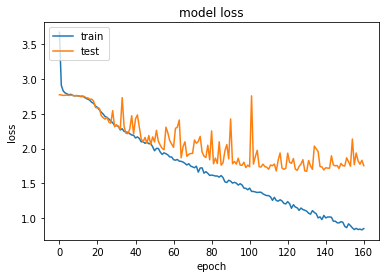

In [171]:
plt.plot(cnnhistory.history['loss'])
plt.plot(cnnhistory.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

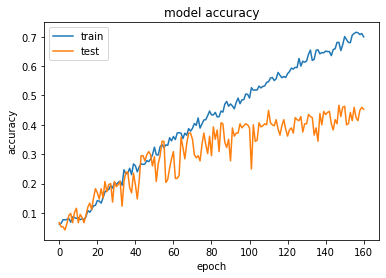

In [172]:
plt.plot(cnnhistory.history['accuracy'])
plt.plot(cnnhistory.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

Saving the model

In [173]:
model_name = 'Emotion_Voice_Detection_Model.h5'
save_dir = os.path.join(os.getcwd(), 'saved_models')
# Save model and weights
if not os.path.isdir(save_dir):
    os.makedirs(save_dir)
model_path = os.path.join(save_dir, model_name)
model.save(model_path)
print('Saved trained model at %s ' % model_path)

Saved trained model at /content/saved_models/Emotion_Voice_Detection_Model.h5 


In [174]:
import json
model_json = model.to_json()
with open("model.json", "w") as json_file:
    json_file.write(model_json)

Loading the model

In [175]:
# loading json and creating model
from keras.models import model_from_json
json_file = open('model.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
loaded_model = model_from_json(loaded_model_json)
# load weights into new model
loaded_model.load_weights("saved_models/Emotion_Voice_Detection_Model.h5")
print("Loaded model from disk")
 
# evaluate loaded model on test data
loaded_model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])
score = loaded_model.evaluate(x_testcnn, y_test, verbose=0)
print("%s: %.2f%%" % (loaded_model.metrics_names[1], score[1]*100))

Loaded model from disk
accuracy: 45.26%


Predicting emotions on the test data

In [176]:
preds = loaded_model.predict(x_testcnn, batch_size=32, verbose=1)

9/9 [==============================] - 0s 5ms/step


In [177]:
preds

array([[7.0621073e-01, 4.2860117e-03, 1.9822942e-01, ..., 3.4445986e-06,
        2.6050661e-04, 2.6316720e-06],
       [1.6084434e-07, 1.2363882e-06, 2.7719625e-07, ..., 9.3353175e-02,
        6.0057830e-02, 2.6256144e-02],
       [2.6957171e-02, 3.5295373e-06, 1.2652308e-04, ..., 2.9678404e-06,
        1.1876328e-02, 1.7126238e-01],
       ...,
       [3.9417332e-01, 2.0704852e-02, 7.6483242e-02, ..., 4.6307588e-05,
        2.8839311e-02, 3.0556729e-03],
       [3.0822428e-03, 3.1428592e-04, 1.0011847e-03, ..., 2.6179241e-05,
        1.5434946e-03, 1.4092635e-02],
       [4.8425820e-02, 8.4406607e-02, 8.1230812e-02, ..., 1.5342199e-03,
        8.5625947e-03, 9.7320871e-03]], dtype=float32)

In [178]:
preds1=preds.argmax(axis=1)

In [179]:
preds1

array([ 0,  9,  8,  0,  8, 14,  7, 15, 14,  5,  3,  2, 14, 11,  3,  4, 10,
        1,  4, 14,  2, 11,  5,  1,  6, 10,  3,  4, 12, 13, 11, 14,  6,  8,
        6,  6, 10,  5, 12,  5,  0,  0,  6,  3,  3,  4, 15,  8, 12,  3, 10,
        3,  1, 13, 15,  3, 14,  5, 10,  4,  6,  5, 10, 11,  7,  5,  9,  5,
       15,  5, 12,  3,  1, 15, 12,  7, 10,  1,  8, 14, 12,  3,  2,  6,  1,
       13, 12, 13,  4,  8,  3,  3,  4, 10,  9,  3, 10,  0, 15, 10, 15, 10,
       10,  3, 12,  8, 10, 12,  9, 14,  4,  1, 12,  2,  8,  0,  0,  2, 12,
        8, 13, 11,  7,  5, 11,  7,  2,  1,  9,  3, 14,  7,  6, 10,  6, 12,
        9,  8,  1,  8, 12, 12, 12,  4,  3,  0, 10,  8, 10, 12,  8,  8,  3,
       11, 14,  6, 15,  4,  2, 11,  4,  8,  3,  5, 11,  8,  7,  8,  8, 15,
       10, 14,  5, 14,  6, 14,  1, 10,  5,  9,  6, 14, 11, 15, 15, 14,  5,
       12,  9,  6,  2,  6,  6,  4,  8, 10,  0,  9,  0,  3, 11, 10,  6,  0,
       11,  5,  8, 14, 10,  8,  1, 11, 11,  1,  7, 14,  1, 12, 14,  7,  3,
       10, 11, 15, 11,  6

In [180]:
abc = preds1.astype(int).flatten()

In [181]:
predictions = (lb.inverse_transform((abc)))

In [182]:
preddf = pd.DataFrame({'predictedvalues': predictions})
preddf[:10]

,predictedvalues
0,female_angry
1,male_calm
2,male_angry
3,female_angry
4,male_angry
5,male_sad
6,female_surprised
7,male_surprised
8,male_sad
9,female_neutral


In [183]:
actual=y_test.argmax(axis=1)
abc123 = actual.astype(int).flatten()
actualvalues = (lb.inverse_transform((abc123)))

In [184]:
actualdf = pd.DataFrame({'actualvalues': actualvalues})
actualdf[:10]

,actualvalues
0,female_fearful
1,male_calm
2,male_angry
3,female_disgust
4,male_happy
5,male_sad
6,female_surprised
7,male_happy
8,male_fearful
9,female_happy


In [185]:
finaldf = actualdf.join(preddf)

Actual v/s Predicted emotions

In [186]:
finaldf[170:180]

,actualvalues,predictedvalues
170,male_disgust,male_disgust
171,male_fearful,male_sad
172,female_calm,female_neutral
173,male_disgust,male_sad
174,female_calm,female_sad
175,male_disgust,male_sad
176,female_happy,female_calm
177,female_calm,male_disgust
178,female_neutral,female_neutral
179,male_calm,male_calm


In [187]:
finaldf.groupby('actualvalues').count()

,predictedvalues
actualvalues,
female_angry,16
female_calm,17
female_disgust,15
female_fearful,21
female_happy,19
female_neutral,12
female_sad,17
female_surprised,14
male_angry,23


In [188]:
finaldf.groupby('predictedvalues').count()

,actualvalues
predictedvalues,
female_angry,15
female_calm,16
female_disgust,13
female_fearful,23
female_happy,14
female_neutral,18
female_sad,21
female_surprised,14
male_angry,26


In [189]:
finaldf.to_csv('Predictions.csv', index=False)

Live Demo  
The file 'output10.wav' in the next cell is the file that was recorded live using the code in AudioRecoreder notebook found in the repository

In [190]:
data, sampling_rate = librosa.load('output10.wav')

Populating the interactive namespace from numpy and matplotlib


/usr/local/lib/python3.7/dist-packages/IPython/core/magics/pylab.py:161: UserWarning: pylab import has clobbered these variables: ['shuffle', 'test']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


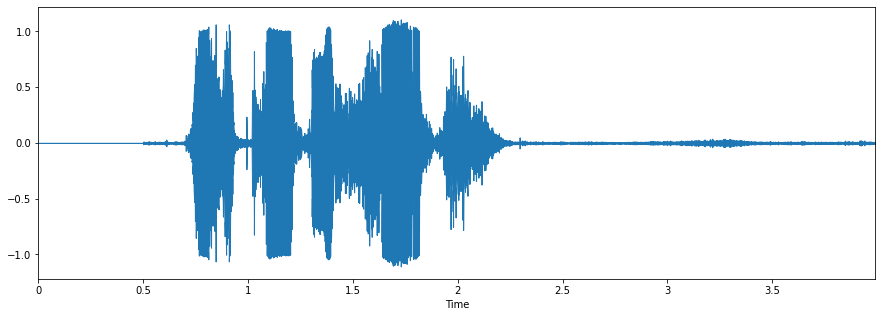

In [191]:
% pylab inline
import os
import pandas as pd
import librosa
import glob 

plt.figure(figsize=(15, 5))
librosa.display.waveplot(data, sr=sampling_rate)

In [192]:
#livedf= pd.DataFrame(columns=['feature'])
X, sample_rate = librosa.load('output10.wav', res_type='kaiser_fast',duration=2.5,sr=22050*2,offset=0.5)
sample_rate = np.array(sample_rate)
mfccs = np.mean(librosa.feature.mfcc(y=X, sr=sample_rate, n_mfcc=13),axis=0)
featurelive = mfccs
livedf2 = featurelive

In [193]:
livedf2= pd.DataFrame(data=livedf2)

In [194]:
livedf2 = livedf2.stack().to_frame().T

In [195]:
livedf2

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215
,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
0,-18.203562,-21.471832,-22.522213,-21.712259,-22.264282,-20.707907,-21.726439,-21.768646,-24.302736,-22.250633,-19.952745,-21.589886,-22.871395,-21.074196,-22.644075,-24.45673,-21.034203,-18.204836,-15.393932,-14.683822,-16.088182,-15.269257,-10.341142,-7.561025,-7.503775,-5.260729,-2.907981,-1.810234,-8.35399,-11.253943,-11.68832,-15.035958,-17.461966,-18.240295,-17.978508,-14.967607,-15.628134,-17.499977,-19.311691,-21.082069,...,-24.037477,-23.211409,-23.118687,-23.47167,-23.638603,-23.450207,-23.264921,-22.719471,-22.14872,-22.658384,-22.88862,-23.306034,-23.30761,-24.259129,-26.328209,-26.651802,-24.688915,-25.379475,-25.8253,-25.058117,-23.847221,-25.266714,-23.488476,-22.239729,-21.664198,-22.395565,-23.06472,-23.522367,-22.248775,-22.428013,-24.273821,-24.639936,-24.929155,-24.439188,-25.210173,-24.740648,-22.311916,-22.579805,-22.314659,-21.552433


In [196]:
twodim= np.expand_dims(livedf2, axis=2)

In [197]:
livepreds = loaded_model.predict(twodim, batch_size=32, verbose=1)

1/1 [==============================] - 0s 18ms/step


In [198]:
livepreds

array([[5.5028421e-01, 2.8676492e-17, 3.5583125e-09, 1.8920394e-04,
        1.1919243e-05, 8.8198227e-23, 3.6429459e-09, 4.9268383e-05,
        4.0070407e-02, 9.8127977e-08, 5.7976902e-04, 8.0640562e-02,
        3.4636498e-04, 3.3984686e-13, 1.0231491e-06, 3.2782722e-01]],
      dtype=float32)

In [199]:
livepreds1=livepreds.argmax(axis=1)

In [200]:
liveabc = livepreds1.astype(int).flatten()

In [201]:
livepredictions = (lb.inverse_transform((liveabc)))
livepredictions

array(['female_angry'], dtype=object)

In [ ]:
while True:pass